In [2]:
from os import listdir
from os.path import isfile, join

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
BUZZpath = join("D:","Stack","Courses","KTH","Courses","05 - Scalable Machine Learning","Final Project","BUZZ1")


In [103]:
beefiles = [f for f in listdir(join(BUZZpath,"bee")) if isfile(join(BUZZpath, "bee",f))]
cricketfiles = [f for f in listdir(join(BUZZpath,"cricket")) if isfile(join(BUZZpath, "cricket",f))]
noisefiles = [f for f in listdir(join(BUZZpath,"noise")) if isfile(join(BUZZpath, "noise",f))]

In [104]:
beefiles[:3]

['bee1000_192_168_4_6-2017-08-29_09-15-01.wav',
 'bee1001_192_168_4_6-2017-08-29_09-15-01.wav',
 'bee1002_192_168_4_6-2017-08-29_09-15-01.wav']

In [105]:
from scipy.io import wavfile
sample_rate, samples = wavfile.read(join(BUZZpath, "bee",beefiles[0]))
# sample_rate, samples = wavfile.read(join(BUZZpath, "cricket",cricketfiles[0]))
# sample_rate, samples = wavfile.read(join(BUZZpath, "noise",noisefiles[0]))

In [106]:
sample_rate

44100

In [107]:
samples

array([440, 443, 446, ..., 447, 456, 459], dtype=int16)

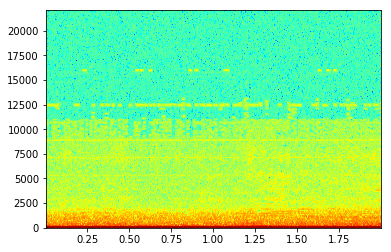

In [238]:
spectrum, freqs, t, im = plt.specgram(samples, NFFT=512, Fs=sample_rate, Fc=0, detrend=plt.mlab.detrend_none,
         window=plt.mlab.window_hanning, noverlap=384,
         cmap=None, xextent=None, pad_to=None, sides='default',
         scale_by_freq=True, mode='default', scale='default')
# cmap="jet"
# cmap='gray'

In [113]:
len(freqs)

257

In [114]:
import numpy as np
np.shape(spectrum)

(257, 686)

In [115]:
im.write_png("bee1001.png")
# im.figure.savefig("bee1001.png", dpi=300)

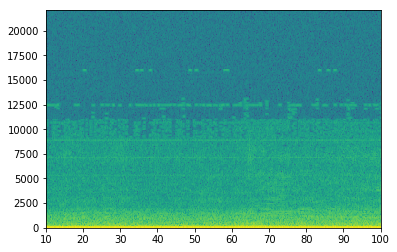

In [235]:
display(im.figure)

In [121]:
im.get_size()

(257, 686)

NameError: name 'values' is not defined

In [ ]:
from scipy.interpolate import griddata

In [161]:
grid_x, grid_y = np.mgrid[0:99:100j, 0:99:100j]

In [166]:
points = np.random.rand(100, 2)
griddata(points, spectrum, (grid_x, grid_y), method='cubic', rescale=False)

ValueError: different number of values and points

In [163]:
np.shape(grid_x)

(100, 100)

In [164]:
grid_x

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  2.,  2.,  2.],
       ...,
       [97., 97., 97., ..., 97., 97., 97.],
       [98., 98., 98., ..., 98., 98., 98.],
       [99., 99., 99., ..., 99., 99., 99.]])

In [170]:
from PIL import Image


TypeError: 'module' object is not callable

In [171]:
im1 = Image.open("bee1001.png")

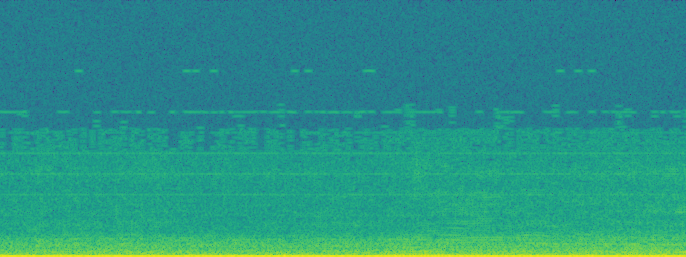

In [175]:
display(im1)

In [186]:
im5 = im.convert(mode='L', )
# make_image(Image.ANTIALIAS)
# .resize((100, 100), Image.ANTIALIAS)

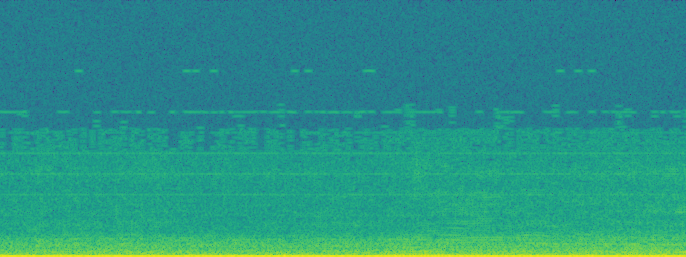

In [191]:
display(im1)

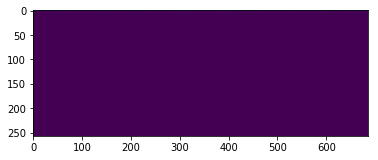

In [203]:
plt.imshow(spectrum)

In [208]:
from skimage.transform import resize
image_resized = resize(spectrum, (100,100), anti_aliasing=True)

D:\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


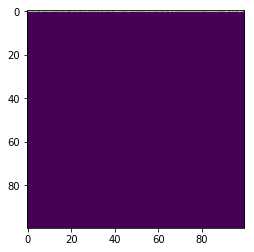

In [210]:
plt.imshow(image_resized)

In [228]:
im.figure.savefig("fig.png")

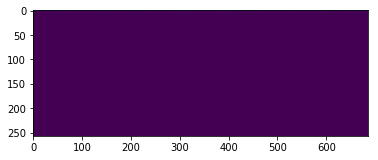

In [225]:
np.min(spectrum), np.max(spectrum)

(1.3696244796590045e-12, 2803.702527293306)

In [230]:
im3 = im.set_extent((0,100,0,100))

In [232]:
plt.display(im3)

AttributeError: module 'matplotlib.pyplot' has no attribute 'display'

In [253]:
fig = plt.figure(frameon=False)
fig.set_size_inches(200/144,200/144)

<Figure size 100x100 with 0 Axes>

In [273]:
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax, cmap='grey')

In [275]:
# image = spectrum * 255.0/spectrum.max()
image = np.log(spectrum) * 255.0/np.max(np.log(spectrum))
# ax.imshow(spectrum, aspect='auto')
ax.imshow(image, aspect='auto')
fig.savefig("fname.png", dpi=300)

In [269]:
np.max(np.log(image))

5.541263545158426